In [46]:
%matplotlib inline
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [48]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [49]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.9842, 0.1373]) 
label: tensor([5.7081])


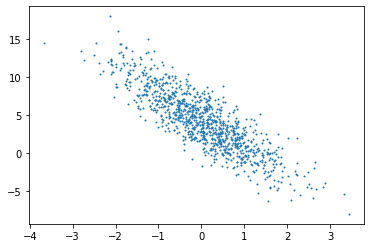

In [50]:
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1);

## Solve with gradient descent

In [51]:
# dataloader
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.7945,  0.7473],
        [-0.6407, -1.0293],
        [ 0.8007,  2.8858],
        [-0.3080, -2.0758],
        [-0.3827, -0.4493],
        [ 1.1946,  0.8410],
        [ 0.5026,  1.5190],
        [ 0.3729, -0.2970],
        [ 1.4141,  1.5243],
        [-1.9221, -0.9204]]) 
 tensor([[ 3.2436],
        [ 6.4036],
        [-4.0274],
        [10.6326],
        [ 4.9683],
        [ 3.7206],
        [ 0.0540],
        [ 5.9385],
        [ 1.8362],
        [ 3.5014]])


In [52]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [53]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [54]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [55]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [56]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [57]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        out = net(X, w, b)
        l = loss(out, y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.038768
epoch 2, loss 0.000144
epoch 3, loss 0.000050


In [58]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0002, -0.0005], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0008], grad_fn=<RsubBackward1>)
